In [ ]:
!pip install category_encoders
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 5.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import pickle
import category_encoders as ce
import joblib
from sklearn.ensemble import GradientBoostingRegressor
import ipywidgets as widgets
from IPython.display import display

In [ ]:


# Upload the scaler file
uploaded_scaler = files.upload()

# Upload the neural network model file
uploaded_model = files.upload()

# Upload the target encoder file
uploaded_encoder = files.upload()


Saving scaler.pkl to scaler.pkl


Saving best_model.pkl to best_model.pkl


Saving target_encoder.pkl to target_encoder.pkl


In [ ]:


# Load the scaler
scaler = joblib.load('scaler.pkl')

# Load the model from the saved file
best_model = joblib.load('best_model.pkl')

# Load the target encoder
target_encoder = joblib.load('target_encoder.pkl')


In [ ]:
# Example new data input
new_input_data = pd.DataFrame({
    'Model year': [2021],
    'Make': ['Audi'],
    'Model': ['S4'],
    'Vehicle class': ['Full-size'],
    'Engine size (L)': [2],
    'Cylinders': [6],
    'Transmission': ['AV'],
    'Fuel type': ['X'],
    'Combined (mpg)': [32]
})



In [ ]:
def predict_with_scaled_input(new_input_data, target_encoder, scaler, best_model):
    # Encode the categorical features in the new_input_data
    new_input_data_encoded = new_input_data.copy()
    categorical_columns = ['Make', 'Model', 'Vehicle class', 'Transmission', 'Fuel type']
    new_input_data_encoded[categorical_columns] = target_encoder.transform(new_input_data[categorical_columns])

    # Rename the categorical columns with "_encoded" suffix
    new_input_data_encoded.rename(columns={col: col + '_encoded' for col in categorical_columns}, inplace=True)

    # Define the desired column order
    desired_columns_order = ['Model year', 'Engine size (L)', 'Cylinders', 'Combined (mpg)',
                             'Make_encoded', 'Fuel type_encoded', 'Transmission_encoded',
                             'Model_encoded', 'Vehicle class_encoded']

    # Reorder the columns
    new_input_data_encoded = new_input_data_encoded.reindex(columns=desired_columns_order)

    # Scale the encoded input data using the loaded scaler
    new_input_data_scaled = scaler.transform(new_input_data_encoded)

    # Make predictions on the encoded input data
    predictions = best_model.predict(new_input_data_scaled)

    return predictions


def determine_rating(predictions):
    ratings = {
        1: (381, 608),
        2: (336, 408),
        3: (284, 356),
        4: (234, 316),
        5: (202, 270),
        6: (165, 226),
        7: (133, 201),
        8: (104, 175),
        9: (99, 147),
        10: (94, 124)
    }

    possible_ratings = []
    for rating, (min_val, max_val) in ratings.items():
        if min_val <= predictions <= max_val:
            possible_ratings.append(rating)

    return possible_ratings if possible_ratings else None  # Return None if no rating is found

In [ ]:

# Initialize widgets for each input feature
model_year_widget = widgets.IntText(description='Model year:', value=2021)
make_widget = widgets.Text(description='Make:', value='Audi')
model_widget = widgets.Text(description='Model:', value='S4')
vehicle_class_widget = widgets.Text(description='Vehicle class:', value='Full-size')
engine_size_widget = widgets.FloatText(description='Engine size (L):', value=2.0)
cylinders_widget = widgets.IntText(description='Cylinders:', value=6)
transmission_widget = widgets.Text(description='Transmission:', value='AV')
fuel_type_widget = widgets.Text(description='Fuel type:', value='X')
combined_mpg_widget = widgets.IntText(description='Combined (mpg):', value=32)

# Button to trigger the prediction
predict_button = widgets.Button(description='Predict')


# Function to run when button is clicked, which uses the prediction function
def on_predict_button_clicked(b):
    # Create a DataFrame from the widget values
    new_input_data = pd.DataFrame({
        'Model year':
        [model_year_widget.value],
        'Make': [make_widget.value],
        'Model': [model_widget.value],
        'Vehicle class': [vehicle_class_widget.value],
        'Engine size (L)': [engine_size_widget.value],
        'Cylinders': [cylinders_widget.value],
        'Transmission': [transmission_widget.value],
        'Fuel type': [fuel_type_widget.value],
        'Combined (mpg)': [combined_mpg_widget.value]
    })

    # Call the prediction function and rating function
    prediction = predict_with_scaled_input(new_input_data, target_encoder, scaler, best_model)
    ratings = determine_rating(prediction)

    # Output the prediction and rating
    print(f'Predicted Value of CO2 emissions per kilometer: {prediction} grams')
    print( "Possible CO2 Ratings:", ratings)


# Tell the button what to do when clicked
predict_button.on_click(on_predict_button_clicked)

# Display the widgets
display(model_year_widget, make_widget, model_widget, vehicle_class_widget,
        engine_size_widget, cylinders_widget, transmission_widget,
        fuel_type_widget, combined_mpg_widget, predict_button)


# Remember to define target_encoder, scaler, and best_model in your notebook environment before using this widget.







IntText(value=2021, description='Model year:')

Text(value='Audi', description='Make:')

Text(value='S4', description='Model:')

Text(value='Full-size', description='Vehicle class:')

FloatText(value=2.0, description='Engine size (L):')

IntText(value=6, description='Cylinders:')

Text(value='AV', description='Transmission:')

Text(value='X', description='Fuel type:')

IntText(value=32, description='Combined (mpg):')

Button(description='Predict', style=ButtonStyle())

Predicted Value of CO2 emissions per kilometer: [309.07630839] grams
Possible CO2 Ratings: [3, 4]



**Fuel Types:**

X = Regular gasoline;

Z = Premium gasoline;

D = Diesel;

E = E85;

N = Natural Gas


**Transmission:**

A = Automatic;

 AM = Automated manual;

 AS = Automatic with select shift;

  AV = Continuously variable


# **Cars**
**Vehicle class**	:            **Interior volume**

Two-seater (T):                           n/a

Minicompact (I) :   	                 less than 2,405 L (85 cu. ft.)

Subcompact (S)	:                          2,405–2,830 L (85–99 cu. ft.)

Compact (C)  	:                             2,830–3,115 L (100–109 cu. ft.)
       
Mid-size (M)    :	                         3,115–3,400 L (110–119 cu. ft.)

Full-size (L)   :                       	3,400 L (120 cu. ft.) or more

Station wagon: Small (WS):  	               less than 3,680 L (130 cu. ft.)

Station wagon: Mid-size (WM):    	             3,680–4,530 L (130–159 cu. ft.)

In [ ]:
    new_input_data = pd.DataFrame({
        'Model year': [model_year_widget.value],
        'Make': [make_widget.value],
        'Model': [model_widget.value],
        'Vehicle class': [vehicle_class_widget.value],
        'Engine size (L)': [engine_size_widget.value],
        'Cylinders': [cylinders_widget.value],
        'Transmission': [transmission_widget.value],
        'Fuel type': [fuel_type_widget.value],
        'Combined (mpg)': [combined_mpg_widget.value]
    })
print(new_input_data)

   Model year  Make    Model Vehicle class  Engine size (L)  Cylinders  \
0        2024  Ford  Mustang    Subcompact              5.0          8   

  Transmission Fuel type  Combined (mpg)  
0           M6         X              22  


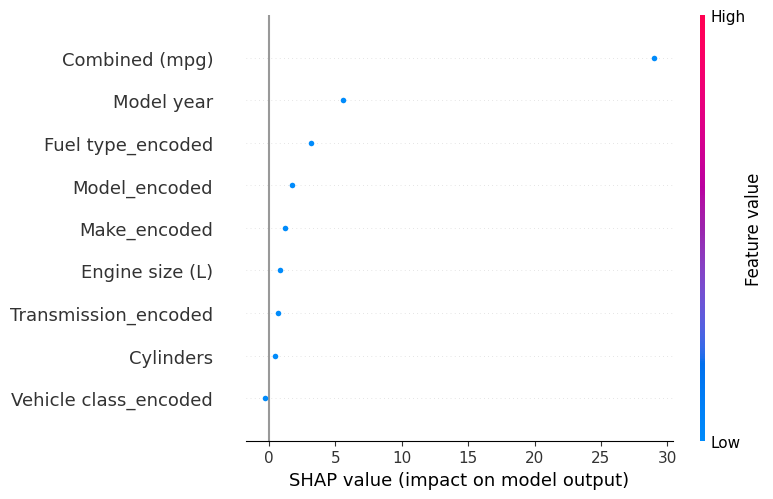

In [ ]:





    new_input_data_encoded = new_input_data.copy()
    categorical_columns = ['Make', 'Model', 'Vehicle class', 'Transmission', 'Fuel type']
    new_input_data_encoded[categorical_columns] = target_encoder.transform(new_input_data[categorical_columns])

    # Rename the categorical columns with "_encoded" suffix
    new_input_data_encoded.rename(columns={col: col + '_encoded' for col in categorical_columns}, inplace=True)

    # Define the desired column order
    desired_columns_order = ['Model year', 'Engine size (L)', 'Cylinders', 'Combined (mpg)',
                             'Make_encoded', 'Fuel type_encoded', 'Transmission_encoded',
                             'Model_encoded', 'Vehicle class_encoded']

    # Reorder the columns
    new_input_data_encoded = new_input_data_encoded.reindex(columns=desired_columns_order)

    # Scale the encoded input data using the loaded scaler
    new_input_data_scaled = scaler.transform(new_input_data_encoded)

    # Make predictions on the encoded input data
    predictions = best_model.predict(new_input_data_scaled)

import shap

# Assuming best_model is your trained Gradient Boosting model
# and new_input_data_scaled is your input data after encoding and scaling

# Initialize the Tree Explainer
explainer = shap.TreeExplainer(best_model)

# Calculate the SHAP values for the scaled input data
shap_values = explainer.shap_values(new_input_data_scaled)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, new_input_data_scaled, feature_names=desired_columns_order)


